# Menggambar Persamaan Bidang Dalam Ruang 3D

# Penyelesaian persamaan Linier
Selesaikan persamaan berikut:

$$
8x_1+x_2+x_3=19\\
x_1+2x_2+3x_3=9\\
2x_1+x_2-x_3=5\
$$

In [1]:
import numpy as np
A=np.array([[8,9,1,19],[1,2,3,9],[2,1,1,5]])
print(A)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


### Mendefinisikan fungsi operasi baris eleminasi Gauss

* RowSwap(Operasi penukaran baris dilakukan dengan menukar posisi dua baris dalam matriks)
* RowScale(Operasi skalasi baris melibatkan mengalikan satu baris matriks dengan suatu skalar.)
* RowAdd(Operasi penambahan baris dilakukan dengan menambahkan kelipatan dari satu baris matriks ke baris lainnya.)



In [2]:
def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

In [3]:
B1 = RowSwap(A,0,2)
B2 = RowScale(A,2,0.5)
B3 = RowAdd(A,0,1,2)

In [4]:
print(A)
print('\n')
print(B2)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


[[ 8.   9.   1.  19. ]
 [ 1.   2.   3.   9. ]
 [ 1.   0.5  0.5  2.5]]


In [5]:
## Tambahkan -2 kali baris 0 ke baris 1
A1 = RowAdd(A,0,1,-2)
print(A1,'\n')

## Tambahkan -4 kali baris 0 ke baris 2
A2 = RowAdd(A1,0,2,-4)
print(A2,'\n')

## Tambahkan -2 kali baris 1 ke baris 2
A3 = RowAdd(A2,1,2,-2)
print(A3,'\n')

## Kalikan baris 1 dengan 1/3
A4 = RowScale(A3,1,1.0/3)
print(A4,'\n')

## Kalikan baris 2 dengan 1/19
A5 = RowScale(A4,2,1.0/-19.)
print(A5)

[[  8.   9.   1.  19.]
 [-15. -16.   1. -29.]
 [  2.   1.   1.   5.]] 

[[  8.   9.   1.  19.]
 [-15. -16.   1. -29.]
 [-30. -35.  -3. -71.]] 

[[  8.   9.   1.  19.]
 [-15. -16.   1. -29.]
 [  0.  -3.  -5. -13.]] 

[[  8.           9.           1.          19.        ]
 [ -5.          -5.33333333   0.33333333  -9.66666667]
 [  0.          -3.          -5.         -13.        ]] 

[[ 8.          9.          1.         19.        ]
 [-5.         -5.33333333  0.33333333 -9.66666667]
 [-0.          0.15789474  0.26315789  0.68421053]]


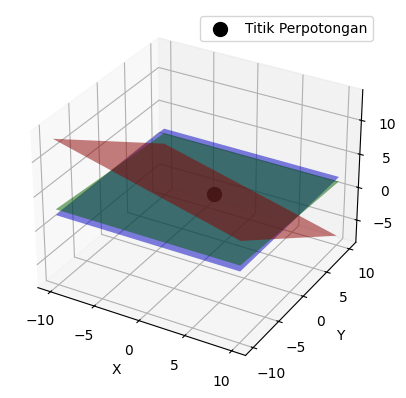

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Koefisien untuk masing-masing persamaan bidang
a1, b1, c1, r1 = 1, 2, 3, 9
a2, b2, c2, r2 = 0, 1, 13, 27
a3, b3, c3, r3 = 0, 0, 1, 2

# Buat data x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Buat grid x, y
X, Y = np.meshgrid(x, y)

# Hitung nilai z sesuai dengan persamaan bidang
Z1 = (r1 - a1*X - b1*Y) / c1
Z2 = (r2 - a2*X - b2*Y) / c2
Z3 = (r3 - a3*X - b3*Y) / c3

# Plot persamaan bidang dalam tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot bidang
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

# Titik perpotongan
A = np.array([[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]])
B = np.array([r1, r2, r3])
intersect = np.linalg.solve(A, B)
ax.scatter(intersect[0], intersect[1], intersect[2], color='black', s=100, label='Titik Perpotongan')

# Label sumbu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()